## 3 
Is there a distinction when considering individuals of equal suitability, and does this affect our results? Moreover, does our outcome differ depending on whether we strictly prefer a superior candidate or are content with someone ranking equally to candidates we’ve previously encountered?

Nemudoma se pojavi vprašanje, kako bomo določili oceno kandidatki? 

V realnem svetu bi vsaki kandidatki posebej dali oceno, ki si jo zasluži. Pri našem modelu je tako najbol smiselno, če vsaki kandidatki določimo naključno oceno od 1 do max_ocena. Seveda se v tem skriva 'napaka' realnosti, da lahko izbiramo med samimi enkami. 

Druga opcija je v realnem svetu manj verjetna, ampak bolj matematično konsistentna. Določimo, da imamo enako število kandidatk z oceno ena, dva, tri, ... vse do max_ocena. Torej poskrbimo, da je število vseh kandidatk z neko številko enaka.

Če smo zgoraj obravnavali zgolj unitarne porazdelitve, bi lahko podobno naredili še z normalno porazdelitvijo ocen kandidatk (torej tistih z oceno 5 bo več kot tistih z oceno 1 ali 10).  

Še naprej se lahko vprašamo, kako bo vplivala na zgornje porazdelitve, če se odločimo spreminjati max_oceno v povezavi z n (število kandidatk). 

Kar hočem povedati možnosti je res ogromno. Zato se bomo osredotočili le na par opcij

## Realni svet  (max_ocena = n) 


Ob premisleku se mi zdi to najbol realno. 

In [153]:
n = 100 # število kandidatk
m = 10000 #kolikokrat poženemo proces iskanja najbolšega partnerja

max_ocena = n # Kandidatka ima oceno od 1 do max_ocena

In [154]:
import numpy as np

tabela_partnerjev = {}
for i in range(m):
    partnerji = np.random.randint(1, max_ocena+1, size=n)
    tabela_partnerjev[i] = partnerji

In [155]:
def NajbolsiPartner(partnerji, stop):
    """Funkcija, ki vrne izbranega partnerja izmed partnerjev, 
    če smo smo jih zavračali do stop partnerja."""
    # partnerji ... seznam partnerjev
    # stop ... kdaj nehamo zavračati vse partnerje 

    vzorec = partnerji[:stop] #vključno s stop
    poroka = partnerji[stop:]

    najbolši = 0 
    za_vedno = 0
    for partner in vzorec:
        if (partner > najbolši):
            najbolši = partner
   
    for partner in poroka:
        if (partner >= najbolši): #Spremenimo, da je tudi enako vredu
            za_vedno = partner
            break
   
    return za_vedno

In [156]:
vsota = 0 
for i in range(m):
    najbolsa_nevesta = max(tabela_partnerjev[i])
    if NajbolsiPartner(tabela_partnerjev[i], round(n * 0.36787944)) == najbolsa_nevesta :
        vsota += 1

print(vsota/m)

0.5149


Zgornja številka ponaraja s koliko procenti smo se poročili z najbolšo nevesto. Pozor! Najbolša nevesta v našem primeru ni nujno samo ena in ni nujno tista z oceno 100. Lahko se zgodi, da neveste z oceno 100 sploh ni takrat je najbolša nevesta tsita z oceno 99.


In [157]:
vsotke = [0] * n
for stop in range(n):
    for i in range(m):
        najbolsa_nevesta = max(tabela_partnerjev[i])
        if NajbolsiPartner(tabela_partnerjev[i], stop) == najbolsa_nevesta :
            vsotke[stop] += 1

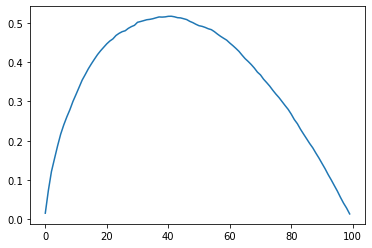

In [158]:
import matplotlib.pyplot as plt

verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

Iz zgornjega grafa opazimo, da se krivulja ne spremeni bistveno od tiste, kjer nismo podvajali vrednosti. Pa vendar lahko opazimo dve stvari:
1. Krivulja je res malenkost zamaknjena v desno, se pravi, se nam najbolj splača ustaviti malo kasneje, kot pri 1/e.
2. Opazimo, da so verjetnosti, da končamo veliko večje. 

Druga točka je posebej presenetljiva, saj nisem pričakoval takega povečanja. Če se odločimo ustaviti optimalno, smo iz približno 1/3 verjetnosti, da bomo končali z najbolšo izbiro prišli kar na 1/2. NORO! 

In [159]:
np.argmax(vsotke)

41

Zgornja številka ponazarja, kdaj se je najbolše ustaviti. 

### Ali je razlika, če se zadovoljimo z nekom, ki je enako dober kot ženekdo pred njim?

V tem razdelku odgovorimo na vprašanje, ali je razlika, če se zadovoljimo z nekom, ki je enako dober kot že nekdo pred njim. Ta razdelek je potreben, da preverimo, kaj se zgodi, če ima vsaka kandidatka naključno določeno številko od ena do sto (npr. dve imata lahko enako število), vendar pa ne bomo izbrali kandidatke, ki ima manjše ali enako število kot njena predhodnica. 

Tako res zmerimo vpliv zastavljenega vprašanja.

In [160]:
def NajbolsiPartner_večji(partnerji, stop):
    """Funkcija, ki vrne izbranega partnerja izmed partnerjev, 
    če smo smo jih zavračali do stop partnerja."""
    # partnerji ... seznam partnerjev
    # stop ... kdaj nehamo zavračati vse partnerje 

    vzorec = partnerji[:stop] #vključno s stop    
    poroka = partnerji[stop:]

    najbolši = 0 
    za_vedno = 0
    for partner in vzorec:
        if (partner > najbolši):
            najbolši = partner
   
    for partner in poroka:
        if (partner > najbolši): #Spremenimo, da je tudi enako vredu
            za_vedno = partner
            break
   
    return za_vedno

In [161]:
vsotke = [0] * n
for stop in range(n):
    for i in range(m):
        najbolsa_nevesta = max(tabela_partnerjev[i])
        if NajbolsiPartner_večji(tabela_partnerjev[i], stop) == najbolsa_nevesta :
            vsotke[stop] += 1

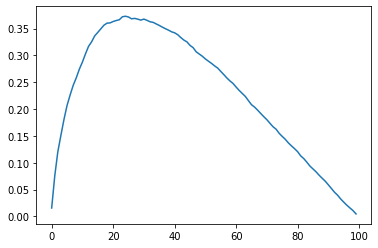

In [162]:
verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

Pomembno je omeniti, da smo ta in zgornji graf proizvedli iz istih podatkov. 
Tako smo lahko prepričani v validnost naših rezultatov. Opazimo, da so procenti znatno nižji in, da je celotna krivulja zamaknjena v levo. Prav tako smiselno. 

Zanimivo je tudi, kaj se zgodi s krivuljo po tem ko doseže maksimum. Opazimo, da krivulja pada skoraj linearno. 

### Ocena od 1 do 10

Vsakemu partnerju dodelimo oceno od 1 - 10. Za začetek si oglejmo kako se naš graf spremeni za $n = 100$.


In [163]:
n = 100 # število kandidatk
m = 10000 #kolikokrat poženemo proces iskanja najbolšega partnerja

max_ocena = 10 # Kandidatka ima oceno od 1 do max_ocena

In [164]:
tabela_partnerjev = {}
for i in range(m):
    partnerji = np.random.randint(1, max_ocena+1, size=n)
    tabela_partnerjev[i] = partnerji

In [165]:
vsotke = [0] * n
vsotke_večji = [0] * n
for stop in range(n):
    for i in range(m):
        najbolsa_nevesta = max(tabela_partnerjev[i])
        if NajbolsiPartner(tabela_partnerjev[i], stop) == najbolsa_nevesta :
            vsotke[stop] += 1
        if NajbolsiPartner_večji(tabela_partnerjev[i], stop) == najbolsa_nevesta :
            vsotke_večji[stop] += 1

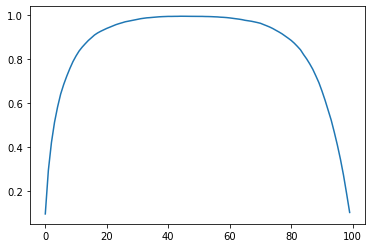

In [166]:
verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

In [167]:
np.argmax(vsotke)

44

Opazimo, da je v tem primeru verjetnost seveda res znatno višja, saj že če izberemo naključno prvega bomo imeli več kot $\frac{1}{10}$ možnosti, da bo najbolši. Tokrat se nam splača čakati dlje časa (pregledati in zavrniti večji vzorec), saj želimo najti tisto osebo z največjim številom, ki so bo skoraj gotovo ponovilo (zaradi velikega vzorca 100 kandidatk).

Na izgled zgleda, kot da se krivulja čisto zgladi, kar ni res. Lahko pogledamo samo sredinski delež. 

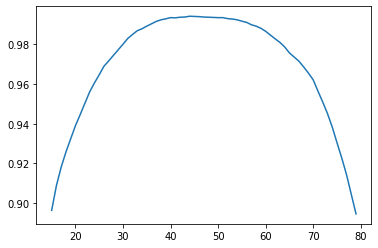

In [168]:
verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x[15:80], verjetnosti[15:80])
plt.show()

In [169]:
np.argmax(vsotke)

44

Primerjajmo s grafom, ko želimo večjega. Predvidevamo, da bo veljala že zgornja ugotovitev. Graf zamaknjen v levo in manjše verjetnosti.

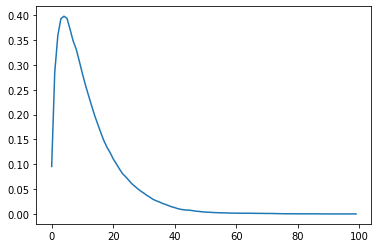

In [170]:
verjetnosti = [x / m for x in vsotke_večji]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

In [171]:
np.argmax(vsotke_večji)

4

Pri tem procesu izbiranja moramo paziti, saj če prehitro spoznamo osebo z največjo številko ostanemo sami. Zato naša funkcija pri velikih številkah vrača verjetnost, da spoznamo najbolšo osebo, skoraj 0.


## Normalna porazdelitev

V zadnjem podpoglavju tega poglavja si ogledamo, kajse zgodi, če številko osebe ne izberemo unitarno, pač pa gede na normalno porzdelitev. (To pomeni, da bo tistih z vrednostjo 50  najbrž več kot tistih z vrednostjo 1 ali 100).

In [172]:
n = 100 # število kandidatk
m = 10000 #kolikokrat poženemo proces iskanja najbolšega partnerja

Želimo imati normalno porazdelitev s povprečjem v $\frac{n}{2}$ ter priti čim bližje temu, da bi zajeli vsa števila od 0 do $n$ (brez tistih večjih od n), zato scale nastavimo na $\frac{\frac{n}{2}}{3}$ oz. $\frac{n}{6}$.   

In [184]:
x = np.random.normal(loc=n/2, scale=n/6, size=(m, n))
x =  np.around(x, decimals=0)

In [185]:
v = 0
for i in range(m):
    v += max(x[i]) 
round(v/m)

92

S tem smo dosegli, da redko dobimo število večje od $n$, ampak za ceno tega,da imamo v povprečju maksimalno število kar za desetino manjše od $n$. Če bi radi nastavili, da bi bil maksimum nekje okoli $n$, potem za varianco vzamemo $\frac{n}{5}$ namesto $\frac{n}{6}$.

In [186]:
y = np.random.normal(loc=n/2, scale=n/5, size=(m, n))
y =  np.around(y, decimals=0)

In [187]:
v = 0
for i in range(m):
    v += max(y[i]) 
round(v/m)

100

Poglejmo grafa tako za x kot y.

In [188]:
vsotke_x = [0] * n
vsotke_y = [0] * n

for stop in range(n):
    for i in range(m):
        najbolsa_nevesta_x = max(x[i])
        najbolsa_nevesta_y = max(y[i])
        if NajbolsiPartner(x[i], stop) == najbolsa_nevesta_x :
            vsotke_x[stop] += 1
        if NajbolsiPartner(y[i], stop) == najbolsa_nevesta_y :
            vsotke_y[stop] += 1

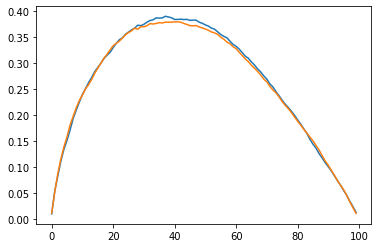

In [189]:
verjetnosti_x = [x / m for x in vsotke_x]
verjetnosti_y = [x / m for x in vsotke_y]
t = [i for i in range(n)]

plt.plot(t, verjetnosti_x)
plt.plot(t, verjetnosti_y)
plt.show()

Funkcija verjetnosti, da izberemo najbolšo nevesto je enaka, ne glede na to kakšno varianco vzamemo. 
To je po svoje zelo smiselno, saj 

In [190]:
vsotke_x = [0] * n
vsotke_y = [0] * n

for stop in range(n):
    for i in range(m):
        najbolsa_nevesta_x = max(x[i])
        najbolsa_nevesta_y = max(y[i])
        if NajbolsiPartner_večji(x[i], stop) == najbolsa_nevesta_x :
            vsotke_x[stop] += 1
        if NajbolsiPartner_večji(y[i], stop) == najbolsa_nevesta_y :
            vsotke_y[stop] += 1

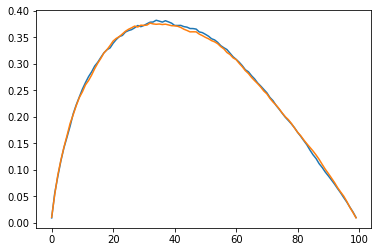

In [191]:
verjetnosti_x = [x / m for x in vsotke_x]
verjetnosti_y = [x / m for x in vsotke_y]
t = [i for i in range(n)]

plt.plot(t, verjetnosti_x)
plt.plot(t, verjetnosti_y)
plt.show()